<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Proyecto/ProyectoParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de Datos
Estos datos son el resultado de un estudio que involucra el análisis de datos de degradación del rendimiento de pruebas aceleradas, publicado en IEEE Transactions on Reliability. La variable de respuesta es la resistencia a la ruptura dialéctica en kilovoltios y las variables predictoras son el tiempo en semanas y la temperatura en grados centígrados.

In [35]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datanelson.csv",delimiter = ',')
x1=np.array(data["x1"])
x2=np.array(data['x2'])
x=np.array([data["x1"],data["x2"]])
y=np.array(data["y"])

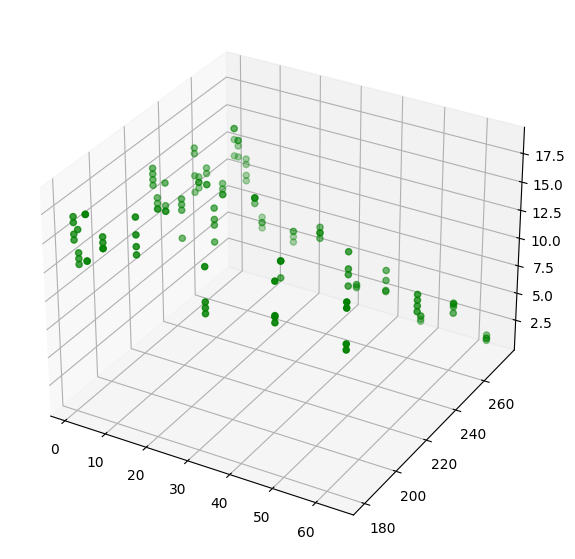

In [233]:
# Creamos la figura
fig = plt.figure(figsize=(14,7))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x1, x2, y, c='g', marker='o')

# Funciones

## modelo
$$log[y]= f(x;\omega)$$
$$log[y]= \omega_1 -\omega_2 x_1 exp[-\omega_3 x_2]$$

In [237]:
def model(x,theta):
  f =np.exp(theta[0]-theta[1]*x[0]*np.exp(-theta[2]*x[1]))
  return f

In [52]:
#modelo lienal
def model_linel(x,theta):
  f = 0.0
  for i in range(len(theta)):
    f+= theta[i]*x**i
  return f


## Prior, Likelihood, MCMC

estos datos se modificaran para que funcionen a su ves con 3 variables, es decir la funcion a prior tendra 3 limites uno por cada peso


In [86]:
theta=[1,2,0.00005]
#model(x.T[:][0],)
lnL=0.0
for i in range(len(x[0])):
  lnL += -0.5*(y[i]-model(x.T[:][i],theta))**2
lnL

-296565.2125386356

In [90]:
#prior
def prior(lim,theta):
  if lim[0,1]> theta[0] >lim[0,0] and lim[1,1]> theta[1] >lim[1,0] and lim[2,1]> theta[2] >lim[2,0]:
    pr=1
  else:
    pr=0
  return pr

#likelihood
def likelihood(x,y,theta, model):
  lnL=0.0
  for i in range(len(x[0])):
    lnL += -0.5*(y[i]-model(x.T[:][i],theta))**2
  return lnL

#Monte Carlo Markov Chain Metropolis Algorithm
# Cadenas de Markov Algoritmo Metropolos
def CM_AM(x,y,theta,sigma0,sigma1,sigma2,lim,iter,model):
  # distribucion de theta
  dist_theta=[]
  dist_theta.append(theta)
  for i in range(iter):
    theta_prop=[np.random.normal(theta[0],sigma0),np.random.normal(theta[1],sigma1),np.random.normal(theta[2],sigma2)]
    lnPost_prop=likelihood(x,y,theta_prop,model)+ np.log(prior(lim,theta_prop))
    lnPost_ini=likelihood(x,y,theta,model)+ np.log(prior(lim,theta))
    if lim[0,1]> theta_prop[0] >lim[0,0] and lim[1,1]> theta_prop[1] >lim[1,0]:
      # lnPost= ln L + ln Pr


      if lnPost_prop > lnPost_ini:
        dist_theta.append(theta_prop)
        theta=theta_prop
        #print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')

      elif lnPost_prop - lnPost_ini > np.log(np.random.uniform(0,1)):
        dist_theta.append(theta_prop)
        theta=theta_prop
        #print(f'postirios: {i}: theta{theta_prop} : prop={lnPost_prop} : ini={lnPost_ini}')


  return dist_theta

#Analisis

<ipython-input-90-c6ee2a30de06>:24: RuntimeWarning: divide by zero encountered in log
  lnPost_prop=likelihood(x,y,theta_prop,model)+ np.log(prior(lim,theta_prop))


[2.42199267 1.91643244 0.08355122]


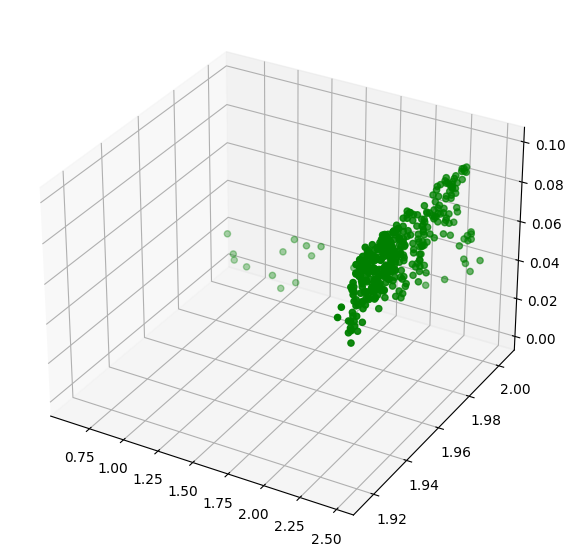

In [262]:
# Pesos
w0=0.0
w1=0.0
w2=-0.0
w=[w0,w1,w2]
# sigmas
sigma0=0.22
sigma1=0.0025
sigma2=0.005
#limites
lim= np.asmatrix([[-4,4],[-4,4],[-0.1,0.1]])

#iteracion
iter=10000

dis_theta=CM_AM(x,y,theta,sigma0,sigma1,sigma2,lim,iter,model)
#dis_theta
dis_theta=np.array(dis_theta)
print(dis_theta[-1])
# Creamos la figura
fig = plt.figure(figsize=(14,7))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(dis_theta.T[0], dis_theta.T[1], dis_theta.T[2], c='g', marker='o')

(0.0, 1.0)

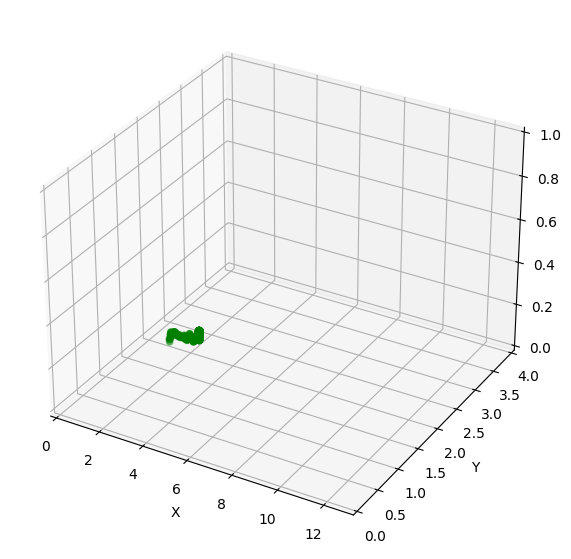

In [260]:
# Creamos la figura
fig = plt.figure(figsize=(14,7))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(dis_theta.T[0], dis_theta.T[1], dis_theta.T[2], c='g', marker='o')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(0,13)
ax1.set_ylim(0,4)
ax1.set_zlim(0,1)

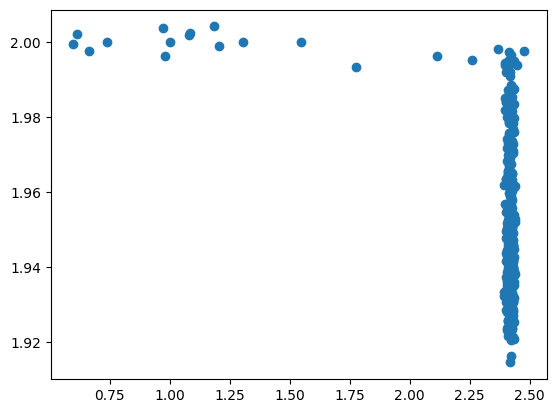

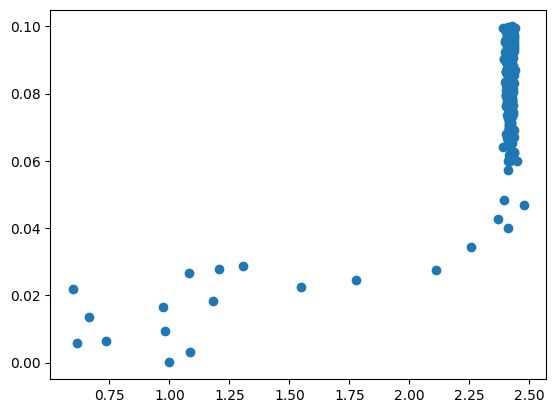

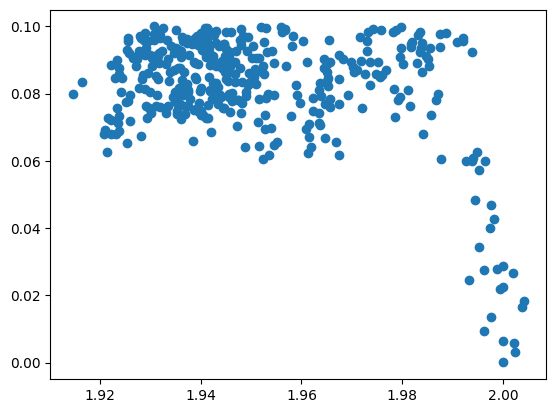

In [263]:
plt.scatter(dis_theta.T[0],dis_theta.T[1])
plt.show()
plt.scatter(dis_theta.T[0],dis_theta.T[2])
plt.show()
plt.scatter(dis_theta.T[1],dis_theta.T[2])
plt.show()